In [45]:
import numpy as np
import pandas as pd

In [9]:
values = [4, 2, 1, 7, 3, 6] # стоимости товаров
weights = [5, 9, 8, 2, 6, 5] # вес товаров
C = 15 # вместимость сумки
n = 6 # количество товаров

In [10]:
c = - np.array(values) # изменяем знак, чтобы перейти от задачи максимизации к задаче минимизации
A = np.array(weights)  # конвертируем список с весами в массив
A = np.expand_dims(A, 0) # преобразуем размерность массива
b = np.array([C]) # конвертируем вместимость в массив

In [11]:
from scipy.optimize import linprog

In [12]:
result = linprog(c=c, A_ub=A, b_ub=b)
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -52.5
              x: [ 0.000e+00  0.000e+00  0.000e+00  7.500e+00  0.000e+00
                   0.000e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  0.000e+00  7.500e+00
                              0.000e+00  0.000e+00]
                 marginals: [ 1.350e+01  2.950e+01  2.700e+01  0.000e+00
                              1.800e+01  1.150e+01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00]
                 marginals: [-3.500e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [13]:
result['x']

array([0. , 0. , 0. , 7.5, 0. , 0. ])

In [14]:
import cvxpy

In [15]:
# С помощью CVXPY создадим переменную-массив. Укажем его размерность, а также условие, 
# что все числа в массиве должны быть целыми:
x = cvxpy.Variable(shape=n, integer=True)

In [16]:
# Далее зададим ограничения, используя матричное умножение:
A = A.flatten() # Преобразуем размерность массива
constraint = cvxpy.sum(cvxpy.multiply(A, x)) <= C
total_value = cvxpy.sum(cvxpy.multiply(x, c))

In [17]:
# Переходим непосредственно к решению задачи:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint])

In [19]:
# Вызываем получившееся решение:
# problem.solve(verbose=True)

In [20]:
x = cvxpy.Variable(shape=n, integer=True)
constraint = cvxpy.sum(cvxpy.multiply(A, x)) <= C
x_positive = x >= 0
total_value = cvxpy.sum(cvxpy.multiply(x, c))

problem = cvxpy.Problem(
    cvxpy.Minimize(total_value), constraints=[constraint, x_positive]
)

problem.solve()
x.value

array([-0., -0., -0.,  7., -0.,  0.])

А что если мы можем брать не любое количество товаров, а только один или не брать их вовсе? Задаём x типа boolean.

In [21]:
x = cvxpy.Variable(shape=n, boolean=True)
constraint = cvxpy.sum(cvxpy.multiply(A, x)) <= C
x_positive = x >= 0
total_value = cvxpy.sum(cvxpy.multiply(x, c))

problem = cvxpy.Problem(
    cvxpy.Minimize(total_value), constraints=[constraint, x_positive]
)

problem.solve()
x.value

array([1., 0., 0., 1., 0., 1.])

# PuLP
Лучшая библиотека для решения задач линейного программирования

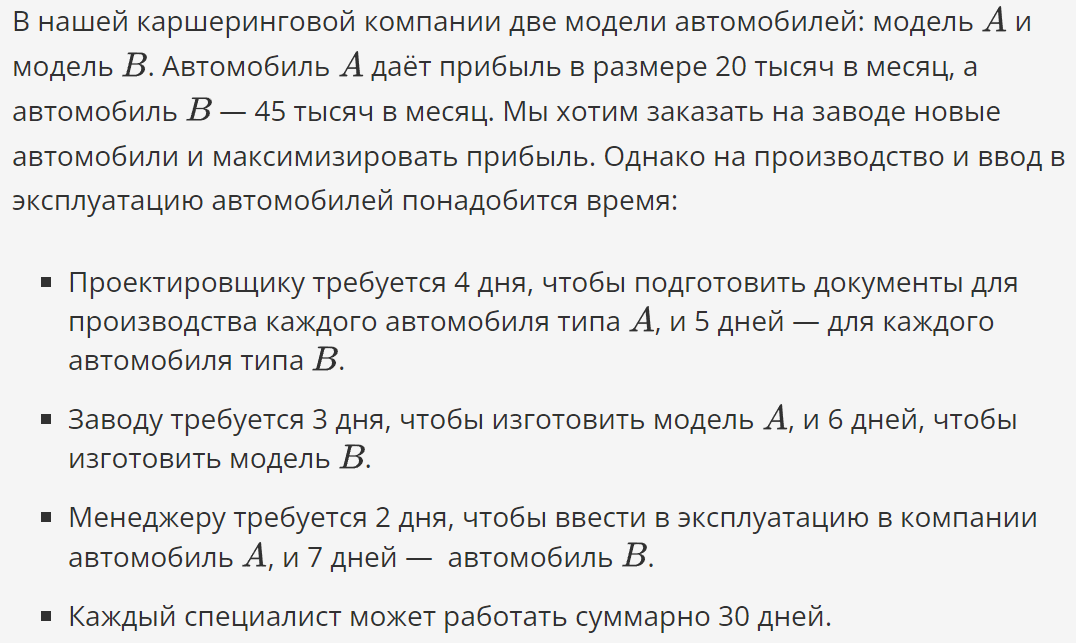

In [22]:
from pulp import *

In [23]:
problem = LpProblem('Производство_машин', LpMaximize)
A = LpVariable('Автомобиль_A', lowBound=0 , cat=LpInteger)
B = LpVariable('Автомобиль_B', lowBound=0 , cat=LpInteger)

# Целевая функция
problem += 20000 * A + 45000 * B

# Ограничения
problem += 4 * A + 5 * B <= 30 
problem += 3 * A + 6 * B <= 30
problem += 2 * A + 7 * B <= 30
problem.solve()

print('Количество автомобилей модели А: ', A.varValue)
print('Количество автомобилей модели В: ', B.varValue)
print('Суммарный доход: ', value(problem.objective))

Количество автомобилей модели А:  1.0
Количество автомобилей модели В:  4.0
Суммарный доход:  200000.0


In [24]:
problem = LpProblem('Свитшоты_и_рубашки', LpMaximize)
A = LpVariable('Свитшот', lowBound=0, cat=LpInteger)
B = LpVariable('Рубашка', lowBound=0, cat=LpInteger)

# Целевая функция, максимизация количества выпущенных свитшотов и рубашек
problem += 30 * A + 24 * B

# Ограничения
problem += A * 1 + B * 1.5 <= 750 # ограничение по потреблению хлопка
problem += A * 2 + B * 1 <= 1000 # ограничение по потреблению полиэстера

problem.solve()

print('Количество свитшотов:', A.varValue)
print('Количество рубашек:', B.varValue)
print('Суммарный доход:', value(problem.objective))

Количество свитшотов: 375.0
Количество рубашек: 250.0
Суммарный доход: 17250.0


In [25]:
problem = LpProblem('Продажа_мячей', LpMaximize)
A = LpVariable('Футбольный', lowBound=0, cat=LpInteger)
B = LpVariable('Баскетбольный', lowBound=0, cat=LpInteger)

# Целевая функция, максимизация прибыли от продажи мячей
problem += 6 * A + 5.5 * B

# Ограничения
problem += A >= 35 # не менее 35 футбольных мячей продается
problem += A <= 45 # не более 45 футбольных мячей продается
problem += B >= 40 # не менее 40 баскетбольных мячей продается
problem += B <= 55 # не менее 55 баскетбольных мячей продается
problem += A + B <= 80 # всего продается 80 мячей

problem.solve()

print('Количество футбольных мячей:', A.varValue)
print('Количество баскетбольных мячей:', B.varValue)
print('Суммарный доход:', value(problem.objective))

Количество футбольных мячей: 40.0
Количество баскетбольных мячей: 40.0
Суммарный доход: 460.0


### Задание 6.1

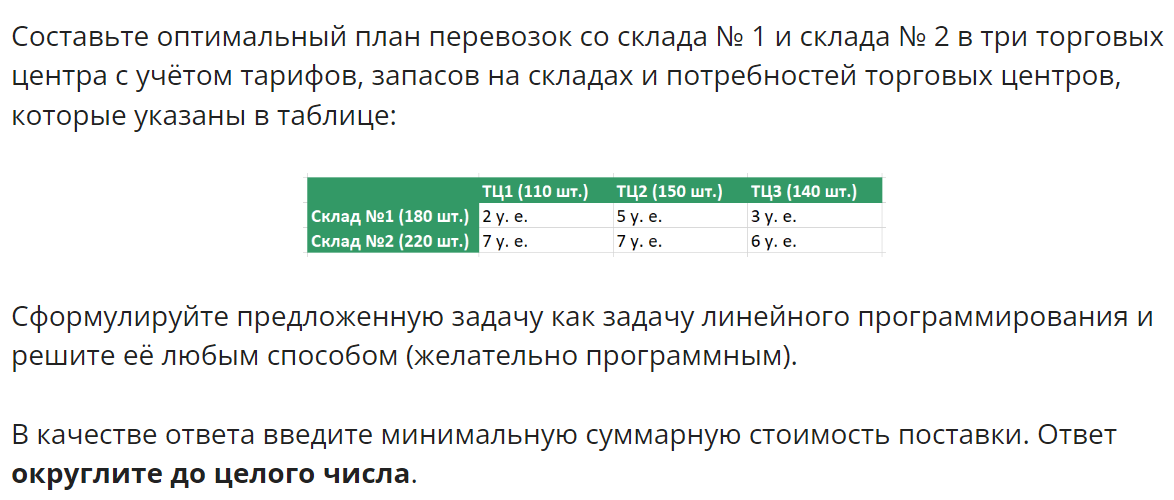

In [70]:
costs_df = pd.DataFrame({
    'Mall1': [2, 7],
    'Mall2': [5, 7],
    'Mall3': [3, 6]
}, index=['Store1', 'Store2'])

In [71]:
costs_df

,Mall1,Mall2,Mall3
Store1,2,5,3
Store2,7,7,6


In [72]:
from pulp import LpMinimize, LpProblem, LpStatus, LpVariable, lpSum

# Transpose the DataFrame to switch rows and columns
costs_df = costs_df.transpose()

# Create the problem
prob = LpProblem('TransportationProblem', LpMinimize)

# Variables: transport from store i to mall j
transport_vars = LpVariable.dicts('Transport', [(i, j) for i in costs_df.columns for j in costs_df.index], lowBound=0)

# Objective function
prob += lpSum([transport_vars[i, j] * costs_df.loc[j, i] for i in costs_df.columns for j in costs_df.index])

# Supply constraints
supply = {'Store1': 180, 'Store2': 220}
for i in costs_df.columns:
    prob += lpSum([transport_vars[i, j] for j in costs_df.index]) <= supply[i]

# Demand constraints
demand = {'Mall1': 110, 'Mall2': 150, 'Mall3': 140}
for j in costs_df.index:
    prob += lpSum([transport_vars[i, j] for i in costs_df.columns]) >= demand[j]

# Solve the problem
prob.solve()


1

In [73]:
# Print the results
for v in prob.variables():
    print(v.name, '=', v.varValue)
print('Total cost = ', pulp.value(prob.objective))

Transport_('Store1',_'Mall1') = 110.0
Transport_('Store1',_'Mall2') = 0.0
Transport_('Store1',_'Mall3') = 70.0
Transport_('Store2',_'Mall1') = 0.0
Transport_('Store2',_'Mall2') = 150.0
Transport_('Store2',_'Mall3') = 70.0
Total cost =  1900.0


### Задание 6.2

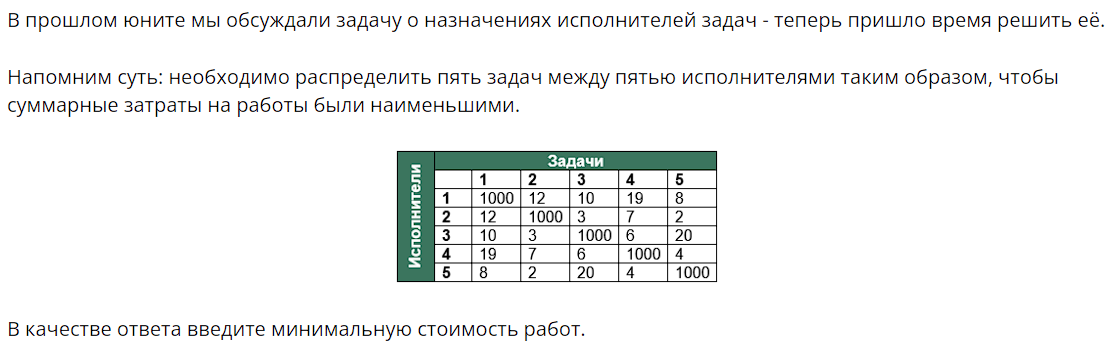

In [74]:
from pulp import LpMinimize, LpProblem, LpStatus, LpVariable, lpSum


In [75]:
costs_df = pd.DataFrame({
    'Worker1': [1000, 12, 12, 19, 8],
    'Worker2': [12, 1000, 3, 7, 2],
    'Worker3': [10, 3, 1000, 6, 20],
    'Worker4': [19, 7, 6, 1000, 4],
    'Worker5': [8, 2, 20, 4, 1000],
}, index=['Task1', 'Task2', 'Task3', 'Task4', 'Task5']).T

In [76]:
costs_df

,Task1,Task2,Task3,Task4,Task5
Worker1,1000,12,12,19,8
Worker2,12,1000,3,7,2
Worker3,10,3,1000,6,20
Worker4,19,7,6,1000,4
Worker5,8,2,20,4,1000


In [77]:
from pulp import LpMinimize, LpProblem, LpStatus, LpVariable, lpSum
import pandas as pd

# Define the problem
prob = LpProblem('TaskAssignmentProblem', LpMinimize)

# Variables: assignment of task j to worker i
assign_vars = LpVariable.dicts('Assign', [(i, j) for i in costs_df.columns for j in costs_df.index], cat='Binary')

# Objective function
prob += lpSum([assign_vars[i, j] * costs_df.loc[j, i] for i in costs_df.columns for j in costs_df.index])

# Each worker is assigned exactly one task
for i in costs_df.columns:
    prob += lpSum([assign_vars[i, j] for j in costs_df.index]) == 1

# Each task is assigned to exactly one worker
for j in costs_df.index:
    prob += lpSum([assign_vars[i, j] for i in costs_df.columns]) == 1

# Solve the problem
prob.solve()

# Print the results
print('Status:', LpStatus[prob.status])
for v in prob.variables():
    print(v.name, '=', v.varValue)
print('Total cost = ', pulp.value(prob.objective))


Status: Optimal
Assign_('Task1',_'Worker1') = 0.0
Assign_('Task1',_'Worker2') = 0.0
Assign_('Task1',_'Worker3') = 0.0
Assign_('Task1',_'Worker4') = 0.0
Assign_('Task1',_'Worker5') = 1.0
Assign_('Task2',_'Worker1') = 0.0
Assign_('Task2',_'Worker2') = 0.0
Assign_('Task2',_'Worker3') = 1.0
Assign_('Task2',_'Worker4') = 0.0
Assign_('Task2',_'Worker5') = 0.0
Assign_('Task3',_'Worker1') = 0.0
Assign_('Task3',_'Worker2') = 0.0
Assign_('Task3',_'Worker3') = 0.0
Assign_('Task3',_'Worker4') = 1.0
Assign_('Task3',_'Worker5') = 0.0
Assign_('Task4',_'Worker1') = 0.0
Assign_('Task4',_'Worker2') = 1.0
Assign_('Task4',_'Worker3') = 0.0
Assign_('Task4',_'Worker4') = 0.0
Assign_('Task4',_'Worker5') = 0.0
Assign_('Task5',_'Worker1') = 1.0
Assign_('Task5',_'Worker2') = 0.0
Assign_('Task5',_'Worker3') = 0.0
Assign_('Task5',_'Worker4') = 0.0
Assign_('Task5',_'Worker5') = 0.0
Total cost =  32.0


In [12]:
from pulp import LpVariable, LpProblem, LpMinimize, lpSum, LpStatus, value
import pandas as pd

# Define the number of cities and the cost matrix
distances = pd.DataFrame(
    [
        [0, 12, 10, 19, 8],
        [12, 0, 3, 7, 2],
        [10, 3, 0, 6, 20],
        [19, 7, 6, 0, 4],
        [8, 2, 20, 4, 0]
    ], 
    index=['A', 'B', 'C', 'D', 'E'],
    columns=['A', 'B', 'C', 'D', 'E']
)

In [13]:
distances

,A,B,C,D,E
A,0,12,10,19,8
B,12,0,3,7,2
C,10,3,0,6,20
D,19,7,6,0,4
E,8,2,20,4,0


In [18]:
N = list(distances.index)

# Define the problem
prob = LpProblem('TSP', LpMinimize)

# Decision variables
# binary variable x[i, j]
x = LpVariable.dicts('x', [(i, j) for i in N for j in N if i != j], cat='Binary')

# auxiliary variable for subtour elimination
u = LpVariable.dicts('u', N, lowBound=0, upBound=(len(N)-1), cat='Integer')  

# Objective
prob += lpSum([x[(i, j)] * distances.loc[i, j] for i in N for j in N if i != j])

# Constraints
for c in N:
    prob += lpSum([x[(i, j)] for i, j in x if i == c]) == 1  # one out-edge
    prob += lpSum([x[(i, j)] for i, j in x if j == c]) == 1  # one in-edge

for c1 in N[1:]:
    for c2 in N[1:]:
        if c1 != c2:
            prob += u[c1] - u[c2] + (len(N) * x[(c1, c2)]) <= len(N) - 1  # subtour elimination

# Solve the problem
prob.solve()

1

In [19]:
# Print the solution
print('Status:', LpStatus[prob.status])
solution = [(i, j) for i, j in x if value(x[i, j]) != 0]
print('Solution: ', solution)
print('Objective (total distance):', value(prob.objective))

Status: Optimal
Solution:  [('A', 'C'), ('B', 'D'), ('C', 'B'), ('D', 'E'), ('E', 'A')]
Objective (total distance): 32.0
